Dataset exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv("../data/dataset.csv")

In [5]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.shape

(4920, 18)

In [6]:
df.info


<bound method DataFrame.info of                                       Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   noda

In [7]:
df.describe

<bound method NDFrame.describe of                                       Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   no

In [8]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [13]:
print(df['Disease'].unique())
print(len(df['Disease'].unique()))


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
41


In [7]:
df.isnull().sum()    

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

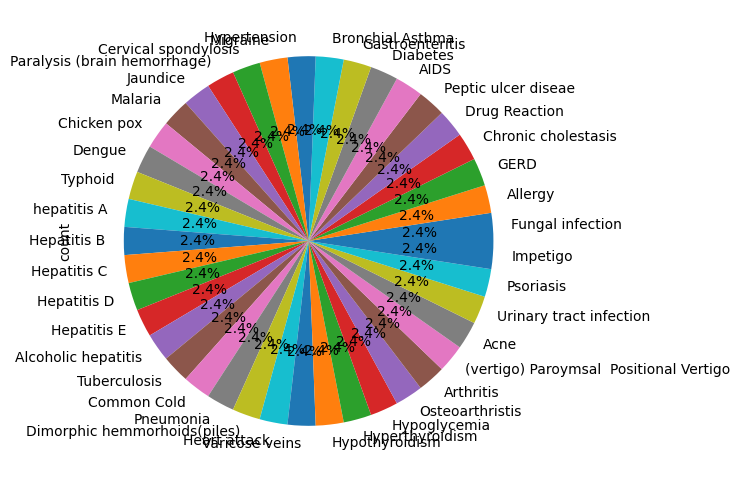

In [24]:
#finding class distribution

class_distr=df['Disease'].value_counts()
class_distr.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))

print(class_distr)

Binary Feature Vectors

In [32]:
#finding unique symptoms anywhere in the dataset
unique_symptoms=set()
for col in ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'] :
    unique_symptom=(df[col].dropna().unique())
    unique_symptoms.update(unique_symptom)
print(unique_symptoms)


{' spinning_movements', ' stiff_neck', ' dark_urine', ' congestion', ' blurred_and_distorted_vision', ' foul_smell_of urine', ' stomach_pain', ' bloody_stool', ' enlarged_thyroid', ' redness_of_eyes', ' phlegm', ' acute_liver_failure', ' yellowing_of_eyes', ' fast_heart_rate', ' headache', ' chills', ' watering_from_eyes', ' mild_fever', ' yellow_urine', ' cramps', ' movement_stiffness', ' nodal_skin_eruptions', ' visual_disturbances', ' slurred_speech', ' cold_hands_and_feets', ' throat_irritation', ' receiving_unsterile_injections', ' breathlessness', ' loss_of_balance', ' receiving_blood_transfusion', ' spotting_ urination', ' palpitations', ' increased_appetite', ' yellow_crust_ooze', ' runny_nose', ' burning_micturition', ' loss_of_appetite', ' rusty_sputum', ' pain_in_anal_region', ' cough', ' neck_pain', ' sunken_eyes', ' pain_behind_the_eyes', ' continuous_feel_of_urine', ' inflammatory_nails', ' skin_peeling', ' toxic_look_(typhos)', ' loss_of_smell', ' polyuria', ' pain_durin

In [35]:
import pandas as pd
import numpy as np

# Step 1: Get all unique symptoms
all_symptoms = set()
symptom_cols = df.columns[1:]  # All columns except 'Disease'

for col in symptom_cols:
    # Get all non-null values from this column
    symptoms = df[col].dropna().unique()
    # Clean and add to set
    all_symptoms.update([s.strip() for s in symptoms])

all_symptoms = sorted(list(all_symptoms))  # Convert to sorted list
print(f"Found {len(all_symptoms)} unique symptoms")

# Step 2: Create binary matrix
binary_data = []

for idx, row in df.iterrows():  # Loop through each row
    
    # Extract this patient's symptoms
    patient_symptoms = []
    for col in symptom_cols:
        if pd.notna(row[col]):  # If not NaN
            patient_symptoms.append(row[col].strip())
    
    # Create binary vector
    binary_row = []
    for symptom in all_symptoms:
        if symptom in patient_symptoms:
            binary_row.append(1)  # Symptom present
        else:
            binary_row.append(0)  # Symptom absent
    
    binary_data.append(binary_row)

# Step 3: Convert to DataFrame
X = pd.DataFrame(binary_data, columns=all_symptoms)
y = df['Disease']

print(f"\n✅ Preprocessing Complete!")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nFirst row of X:")
print(X.iloc[0])


Found 131 unique symptoms

✅ Preprocessing Complete!
X shape: (4920, 131)
y shape: (4920,)

First row of X:
abdominal_pain           0
abnormal_menstruation    0
acidity                  0
acute_liver_failure      0
altered_sensorium        0
                        ..
weight_loss              0
yellow_crust_ooze        0
yellow_urine             0
yellowing_of_eyes        0
yellowish_skin           0
Name: 0, Length: 131, dtype: int64


In [36]:
# Check if first patient has any symptoms marked as 1
print(f"Patient 0 has {X.iloc[0].sum()} symptoms")
print(f"Their disease: {y.iloc[0]}")


Patient 0 has 4 symptoms
Their disease: Fungal infection


In [37]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Feature matrix
    y,                    # Target labels
    test_size=0.2,        # 20% for testing (0.2 = 20%)
    random_state=42,      # For reproducibility
    stratify=y            # Maintain class distribution
)

# Verify the split
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"Training percentage: {len(X_train)/len(X) * 100:.1f}%")
print(f"Testing percentage: {len(X_test)/len(X) * 100:.1f}%")

# Verify shapes
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Training set: 3936 samples
Testing set: 984 samples
Training percentage: 80.0%
Testing percentage: 20.0%

X_train shape: (3936, 131)
X_test shape: (984, 131)
y_train shape: (3936,)
y_test shape: (984,)


In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# ============================================
# MODEL 1: Random Forest
# ============================================
print("🌲 Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 decision trees
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    max_depth=10           # Limit tree depth to prevent overfitting
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

training_time = time.time() - start_time
print(f"✅ Random Forest trained in {training_time:.2f} seconds")
print(f"   Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")


# ============================================
# MODEL 2: Gradient Boosting
# ============================================
print("\n🚀 Training Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100,      # 100 boosting stages
    learning_rate=0.1,     # Step size for gradient descent
    max_depth=5,           # Depth of each tree
    random_state=42        # For reproducibility
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)

training_time = time.time() - start_time
print(f"✅ Gradient Boosting trained in {training_time:.2f} seconds")
print(f"   Accuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")


# ============================================
# COMPARISON
# ============================================
print("\n" + "="*50)
print("📊 MODEL COMPARISON")
print("="*50)
print(f"Random Forest:         {rf_accuracy*100:.2f}%")
print(f"Gradient Boosting:     {gb_accuracy*100:.2f}%")
print("="*50)

if rf_accuracy > gb_accuracy:
    print("🏆 Winner: Random Forest")
    best_model = rf_model
    best_name = "Random Forest"
    best_accuracy = rf_accuracy
else:
    print("🏆 Winner: Gradient Boosting")
    best_model = gb_model
    best_name = "Gradient Boosting"
    best_accuracy = gb_accuracy

print(f"\n🎯 Best Model: {best_name} with {best_accuracy*100:.2f}% accuracy")


🌲 Training Random Forest...
✅ Random Forest trained in 0.56 seconds
   Accuracy: 1.0000 (100.00%)

🚀 Training Gradient Boosting...
✅ Gradient Boosting trained in 40.31 seconds
   Accuracy: 1.0000 (100.00%)

📊 MODEL COMPARISON
Random Forest:         100.00%
Gradient Boosting:     100.00%
🏆 Winner: Gradient Boosting

🎯 Best Model: Gradient Boosting with 100.00% accuracy



📊 Detailed Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00   

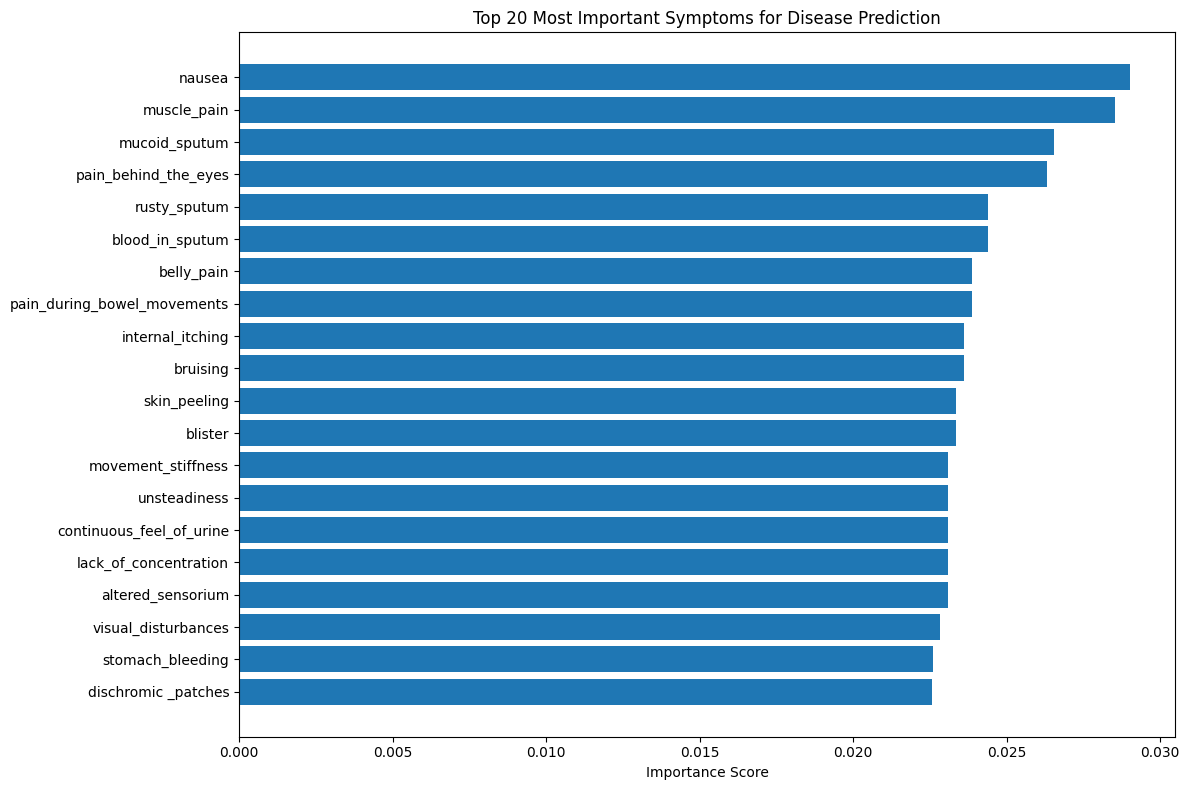

In [39]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# DETAILED CLASSIFICATION REPORT
# ============================================
print("\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ============================================
# FEATURE IMPORTANCE
# ============================================
# Which symptoms are most important for prediction?
feature_importance = pd.DataFrame({
    'symptom': all_symptoms,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Top 20 Most Important Symptoms:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(top_20['symptom'], top_20['importance'])
plt.xlabel('Importance Score')
plt.title('Top 20 Most Important Symptoms for Disease Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [40]:
import joblib
import os

# ============================================
# CREATE MODELS DIRECTORY
# ============================================
os.makedirs('../models', exist_ok=True)
print("📁 Created 'models' directory")

# ============================================
# SAVE TRAINED MODEL
# ============================================
model_path = '../models/symptom_disease_classifier.pkl'
joblib.dump(best_model, model_path)
print(f"✅ Model saved to: {model_path}")
print(f"   Model type: {best_name}")
print(f"   Accuracy: {best_accuracy*100:.2f}%")

# ============================================
# SAVE SYMPTOM LIST
# ============================================
# This is needed to create binary vectors during prediction
symptom_list_path = '../models/symptom_list.pkl'
joblib.dump(all_symptoms, symptom_list_path)
print(f"✅ Symptom list saved to: {symptom_list_path}")
print(f"   Total symptoms: {len(all_symptoms)}")

# ============================================
# SAVE DISEASE LIST
# ============================================
disease_list_path = '../models/disease_list.pkl'
disease_list = y.unique().tolist()
joblib.dump(disease_list, disease_list_path)
print(f"✅ Disease list saved to: {disease_list_path}")
print(f"   Total diseases: {len(disease_list)}")

# ============================================
# VERIFY FILES EXIST
# ============================================
print("\n🔍 Verifying saved files...")
files_to_check = [model_path, symptom_list_path, disease_list_path]

for file_path in files_to_check:
    if os.path.exists(file_path):
        size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"   ✅ {file_path} ({size_mb:.2f} MB)")
    else:
        print(f"   ❌ {file_path} NOT FOUND!")

print("\n🎉 MODEL EXPORT COMPLETE!")
print("Your model is ready to be integrated into Flask backend.")


📁 Created 'models' directory
✅ Model saved to: ../models/symptom_disease_classifier.pkl
   Model type: Gradient Boosting
   Accuracy: 100.00%
✅ Symptom list saved to: ../models/symptom_list.pkl
   Total symptoms: 131
✅ Disease list saved to: ../models/disease_list.pkl
   Total diseases: 41

🔍 Verifying saved files...
   ✅ ../models/symptom_disease_classifier.pkl (3.99 MB)
   ✅ ../models/symptom_list.pkl (0.00 MB)
   ✅ ../models/disease_list.pkl (0.00 MB)

🎉 MODEL EXPORT COMPLETE!
Your model is ready to be integrated into Flask backend.
